<a href="https://colab.research.google.com/github/KhatijaBegum27/AI-ML-Projects/blob/main/SyntheticDataGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sdv==1.15.0 pandas numpy matplotlib seaborn scikit-learn openpyxl

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load dataset
dataset = '/content/default of credit card clients.xls'
data = pd.read_excel(dataset, header=1)
data.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)

In [6]:
# Explore data
print(data.shape)
data.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Data Preprocesing

# Drop ID column
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)

# Handle categorical & numeric types
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numeric_cols = [col for col in data.columns if col not in categorical_cols]

# Normalize numerical features for stability
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   0.010101    2          2         1  0.051724    0.4    0.4    0.1    0.1   
1   0.111111    2          2         2  0.086207    0.1    0.4    0.2    0.2   
2   0.080808    2          2         2  0.224138    0.2    0.2    0.2    0.2   
3   0.040404    2          2         1  0.275862    0.2    0.2    0.2    0.2   
4   0.040404    1          2         1  0.620690    0.1    0.2    0.1    0.2   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0    0.0  ...   0.160138   0.080648   0.260979  0.000000  0.000409  0.000000   
1    0.2  ...   0.163220   0.084074   0.263485  0.000000  0.000594  0.001116   
2    0.2  ...   0.173637   0.095470   0.272928  0.001738  0.000891  0.001116   
3    0.2  ...   0.186809   0.109363   0.283685  0.002290  0.001199  0.001339   
4    0.2  ...   0.179863   0.099633   0.275681  0.002290  0.021779  0.011160   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  defau

In [8]:
# Create SDV Metadata for CTGAN
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.update_column('SEX', sdtype='categorical')
metadata.update_column('EDUCATION', sdtype='categorical')
metadata.update_column('MARRIAGE', sdtype='categorical')
metadata.update_column('default_payment_next_month', sdtype='categorical')

In [9]:
# Train CTGAN Model
synthesizer = CTGANSynthesizer(
    metadata=metadata,
    enforce_rounding=True,
    epochs=30
)

synthesizer.fit(data)

print("\n CTGAN Model Trained Successfully!")


 CTGAN Model Trained Successfully!


In [11]:
# Generate Synthetic Data
synthetic_data = synthesizer.sample(num_rows=len(data))
print("Synthetic Data Generated!")
print(synthetic_data.head())

Synthetic Data Generated!
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
0   0.012769    1          1         1  0.065082  0.393354  0.403677   
1   0.380562    2          2         1  0.572527  0.301731  0.099537   
2   0.355814    2          1         0  0.117002  0.196266  0.202214   
3   0.215527    1          1         1  0.284913  0.196505  0.199239   
4   0.207292    1          1         1  0.352949  0.000000  0.099797   

      PAY_3     PAY_4     PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0  0.200830  0.196647  0.199009  ...   0.262426   0.319951   0.281660   
1  0.101416  0.483679  0.101269  ...   0.162447   0.077212   0.258667   
2  0.411716  0.397948  0.392148  ...   0.160648   0.151826   0.266627   
3  0.201191  0.199564  0.199284  ...   0.289317   0.118306   0.270081   
4  0.102764  0.100081  0.000000  ...   0.206191   0.078902   0.258770   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0  0.002209  0.001890  0.000000  0.01

In [13]:
# Evaluate (Real vs Symmetric)
def ks_test(real, synth):
    p_values = []
    for col in numeric_cols:
        p = ks_2samp(real[col], synth[col])[1]
        p_values.append(p)
    return np.mean(np.array(p_values) > 0.05)

similarity_score = ks_test(data, synthetic_data)
print(f" Average Statistical Fidelity (KS Test): {similarity_score*100:.2f}%")

 Average Statistical Fidelity (KS Test): 0.00%


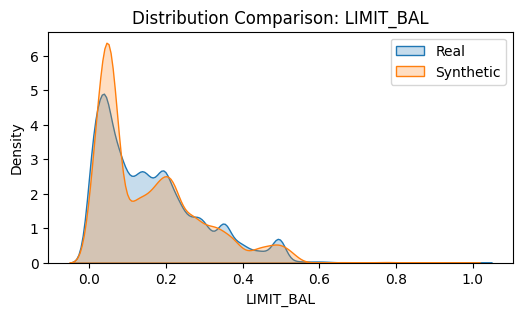

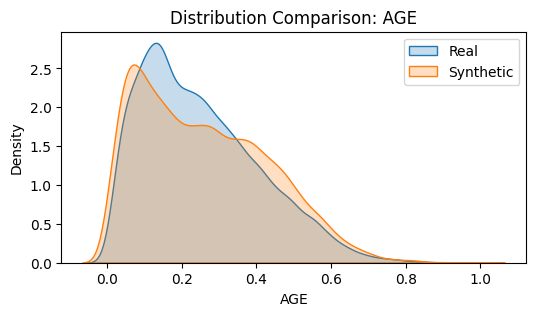

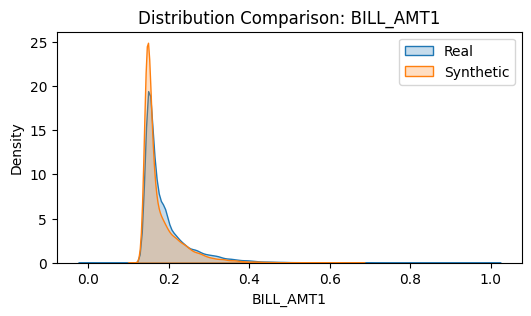

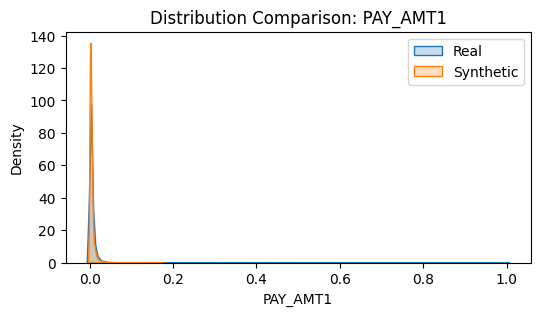

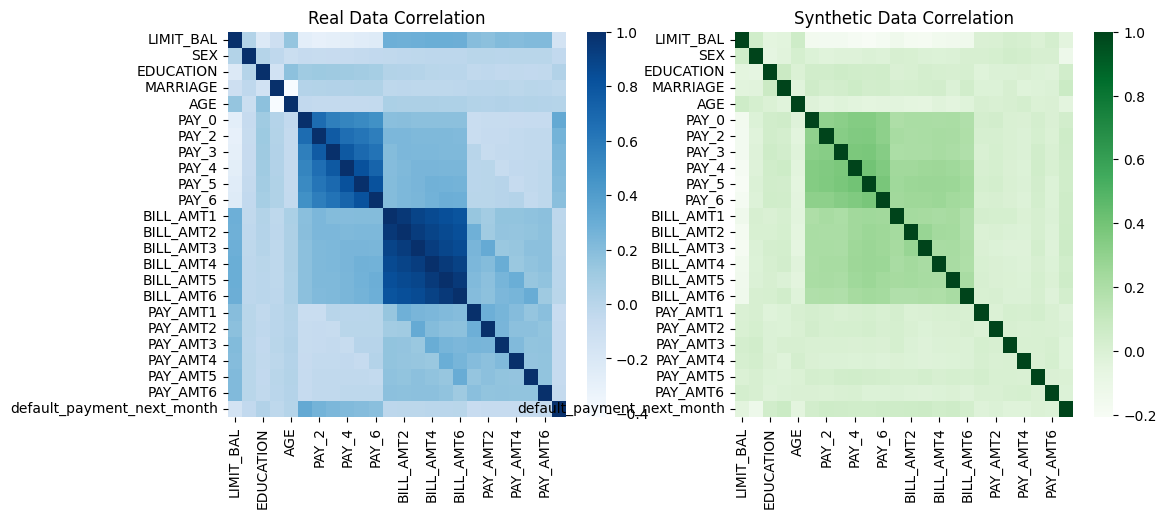

In [20]:
# Visualizations

# Compare distributions of a few numerical features
cols_to_plot = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
for col in cols_to_plot:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data[col], label='Real', fill=True)
    sns.kdeplot(synthetic_data[col], label='Synthetic', fill=True)
    plt.title(f'Distribution Comparison: {col}')
    plt.legend()
    plt.show()

# Correlation heatmap comparison
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(data.corr(), cmap='Blues')
plt.title("Real Data Correlation")

plt.subplot(1,2,2)
sns.heatmap(synthetic_data.corr(), cmap='Greens')
plt.title("Synthetic Data Correlation")
plt.show()

In [18]:
# Save Synthetic Data to CSV
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [19]:
# Training a simple model on real vs synthetic data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_real = data.drop('default_payment_next_month', axis=1)
y_real = data['default_payment_next_month'].astype(int)

X_syn = synthetic_data.drop('default_payment_next_month', axis=1)
y_syn = synthetic_data['default_payment_next_month'].astype(int)

# Train-test split for both
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_real, y_real, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)

# Train model on real data
model_real = LogisticRegression(max_iter=500)
model_real.fit(Xr_train, yr_train)
acc_real = accuracy_score(yr_test, model_real.predict(Xr_test))

# Train model on synthetic data
model_syn = LogisticRegression(max_iter=500)
model_syn.fit(Xs_train, ys_train)
acc_syn = accuracy_score(ys_test, model_syn.predict(Xs_test))

print(f"\n Model Accuracy Comparison:")
print(f"Trained on Real Data: {acc_real*100:.2f}%")
print(f"Trained on Synthetic Data: {acc_syn*100:.2f}%")

print("\n Synthetic Financial Data Generation & Evaluation Completed!")


 Model Accuracy Comparison:
Trained on Real Data: 81.05%
Trained on Synthetic Data: 66.37%

 Synthetic Financial Data Generation & Evaluation Completed!
